In [1]:
# Importing functions that create the images
from figures_report.figures_report import figure_1, figure_2, figure_3

/home/bowy/.local/lib/python3.8/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Setting h5py.default_file_mode is deprecated. 'r' (read-only) is the default from h5py 3.0.
  h5py.get_config().default_file_mode = 'r'


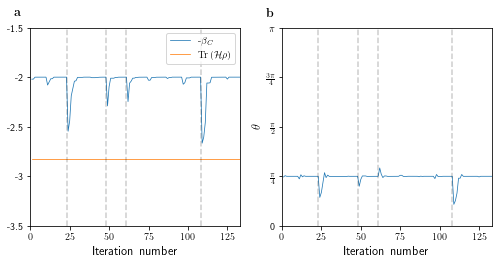

In [2]:
figure_1()

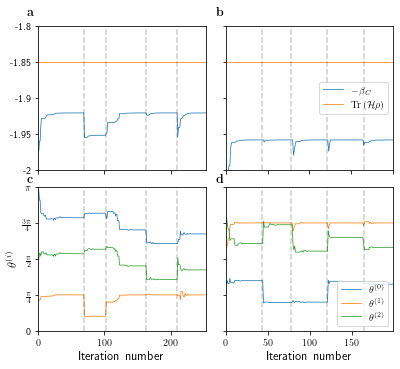

In [3]:
figure_2()

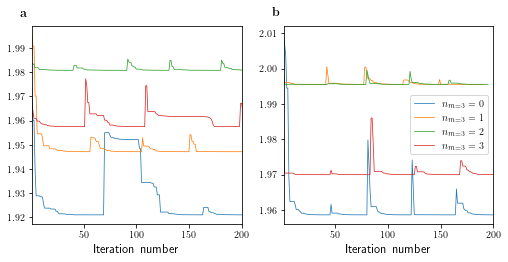

In [4]:
figure_3()